In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels) , (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [4]:
train_labels.shape

(8982,)

In [5]:
test_data.shape

(2246,)

In [8]:
len(train_data)

8982

In [9]:
train_data.ndim

1

# Decoding newswires back to text

In [10]:
word_index = reuters.get_word_index()

557056/550378 [==============================] - 1s 2us/step


In [11]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [12]:
type(word_index)

dict

In [13]:
len(word_index)

30979

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [15]:
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [20]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [17]:
decoded_newswire = ''.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [18]:
decoded_newswire

'???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3'

In [22]:
train_labels[10]

3

# Preparing the dataset

In [23]:
import numpy as np

In [26]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [27]:
#vectorized training data
x_train = vectorize_sequences(train_data)

In [28]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [29]:
x_train.shape

(8982, 10000)

In [31]:
len(x_train[100])

10000

In [33]:
x_test = vectorize_sequences(test_data)

In [34]:
x_test.shape

(2246, 10000)

In [37]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

In [45]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [46]:
#our_vectorized trainin'_labels
one_hot_train_labels =  to_one_hot(train_labels)

In [47]:
#our vectorized test_labels
one_hot_test_labels = to_one_hot(test_labels)

In [48]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#there is a built in function in keras to for one_hot_encoding
# 'to_categorical(array)' converts the given array into a vector

# Building the network

In [50]:
from keras import models
from keras import layers

In [51]:
model = models.Sequential()

In [54]:
model.add(layers.Dense(64, activation = 'relu', input_shape =(10000,)))

In [55]:
model.add(layers.Dense(64, activation = 'relu'))

In [56]:
model.add(layers.Dense(46, activation = 'softmax'))

In [58]:
model.compile(optimizer ='rmsprop' ,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Validation_set

In [59]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [61]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# training

In [62]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 329us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 183us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 183us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 185us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 200us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9843 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 2s 237us/step - loss: 0.5665 - acc: 0.8801 - val_loss: 0.9413 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 2s 201us/step - loss: 0.4581 - acc: 0.9049 - val_loss: 0.9076 - val_acc: 0.8020


In [63]:
import matplotlib.pyplot as pt

In [64]:
history_dict = history.history

In [65]:
history_dict

{'val_loss': [1.7208096437454223,
  1.3458682403564453,
  1.17075843334198,
  1.0792589359283447,
  0.9843156824111938,
  0.9413455123901368,
  0.9076323547363281,
  0.936066508769989,
  0.8909048333168029,
  0.9061348400115967,
  0.9183057985305786,
  0.9057807183265686,
  0.9332348356246948,
  0.969075261592865,
  0.9690782432556152,
  1.020650945663452,
  1.02352574634552,
  1.0428186149597167,
  1.100370768547058,
  1.0703107404708863],
 'val_acc': [0.6120000009536744,
  0.7060000066757202,
  0.7429999876022338,
  0.7589999938011169,
  0.7820000085830688,
  0.8030000052452088,
  0.8019999942779541,
  0.7889999942779541,
  0.8090000028610229,
  0.8110000052452088,
  0.8130000114440918,
  0.8129999980926513,
  0.8100000076293945,
  0.8060000076293945,
  0.8140000138282776,
  0.8059999895095825,
  0.7959999966621399,
  0.8069999918937684,
  0.7960000076293945,
  0.8020000004768372],
 'loss': [2.53220713918175,
  1.4452012063148056,
  1.0952716777570204,
  0.8696656611532653,
  0.70335

In [69]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [70]:
len(history_dict['acc'])

20

In [71]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

In [74]:
epochs

range(1, 21)

In [75]:
val_loss_values

[1.7208096437454223,
 1.3458682403564453,
 1.17075843334198,
 1.0792589359283447,
 0.9843156824111938,
 0.9413455123901368,
 0.9076323547363281,
 0.936066508769989,
 0.8909048333168029,
 0.9061348400115967,
 0.9183057985305786,
 0.9057807183265686,
 0.9332348356246948,
 0.969075261592865,
 0.9690782432556152,
 1.020650945663452,
 1.02352574634552,
 1.0428186149597167,
 1.100370768547058,
 1.0703107404708863]

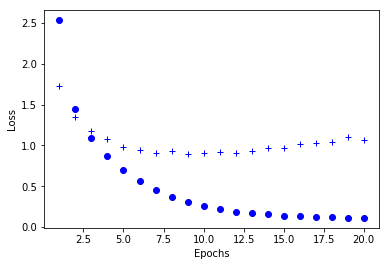

In [78]:
#plotting training and validation loss
pt.plot(epochs, loss_values, 'bo')
pt.plot(epochs, val_loss_values, 'b+')
pt.xlabel('Epochs')
pt.ylabel('Loss')
pt.show()

In [79]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

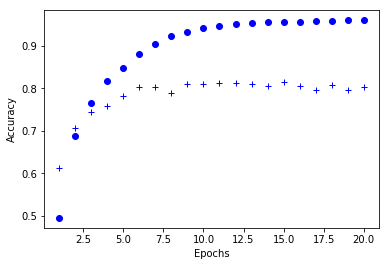

In [80]:
#plotting training and validation accuracy
pt.plot(epochs, acc_values, 'bo')
pt.plot(epochs, val_acc_values ,'b+')
pt.xlabel('Epochs')
pt.ylabel('Accuracy')
pt.show()

In [81]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 198us/step


[1.2108068340926539, 0.7796081923950174]

In [83]:
prediction = model.predict(x_test)

In [89]:
prediction.shape

(2246, 46)

In [85]:
np.argmax(prediction[0])

3

In [88]:
np.argmax(prediction[47])

4

In [90]:
model = models.Sequential()

In [91]:
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))

In [92]:
model.add(layers.Dense(64, activation='relu'))

In [93]:
model.add(layers.Dense(46, activation='softmax'))

In [95]:
model.compile(optimizer = 'rmsprop',
              loss= 'categorical_crossentropy',
              metrics = ['accuracy'])

In [96]:
model.fit(x_train,
          one_hot_train_labels,
          epochs=9,
          batch_size=512,
          validation_data= (x_val, y_val))

Train on 8982 samples, validate on 1000 samples
Epoch 1/9
8982/8982 [==============================] - 3s 279us/step - loss: 2.4437 - acc: 0.5332 - val_loss: 1.5163 - val_acc: 0.6780
Epoch 2/9
8982/8982 [==============================] - 2s 207us/step - loss: 1.3241 - acc: 0.7161 - val_loss: 1.0344 - val_acc: 0.7680
Epoch 3/9
8982/8982 [==============================] - 2s 209us/step - loss: 0.9744 - acc: 0.7869 - val_loss: 0.7680 - val_acc: 0.8390
Epoch 4/9
8982/8982 [==============================] - 2s 211us/step - loss: 0.7565 - acc: 0.8390 - val_loss: 0.5781 - val_acc: 0.8850
Epoch 5/9
8982/8982 [==============================] - 2s 252us/step - loss: 0.5963 - acc: 0.8766 - val_loss: 0.4485 - val_acc: 0.9160
Epoch 6/9
8982/8982 [==============================] - 2s 221us/step - loss: 0.4750 - acc: 0.9010 - val_loss: 0.3709 - val_acc: 0.9390
Epoch 7/9
8982/8982 [==============================] - 2s 209us/step - loss: 0.3830 - acc: 0.9176 - val_loss: 0.2823 - val_acc: 0.9530
Epoch 8

In [97]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 187us/step


[0.9802468936568589, 0.7907390917716871]

Accuracy of a random baseline

In [98]:
import copy

In [99]:
test_labels_copy = copy.copy(test_labels)

In [100]:
np.random.shuffle(test_labels_copy)

In [101]:
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19723953695458593

In [104]:
predictions = model.predict(x_test)

In [105]:
predictions.shape

(2246, 46)

In [107]:
#the coefficients in a single sample of predictions vector sum to 1
np.sum(predictions[0])

1.0